<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Gen AI Experiments](https://img.shields.io/badge/Gen%20AI%20Experiments-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://github.com/buildfastwithai/gen-ai-experiments)
[![Gen AI Experiments GitHub](https://img.shields.io/github/stars/buildfastwithai/gen-ai-experiments?style=for-the-badge&logo=github&color=gold)](http://github.com/buildfastwithai/gen-ai-experiments)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1MZNx2xpWKy4wmGSHHsvAXnUGUnaFTU_C?usp=sharing)
## Master Generative AI in 8 Weeks
**What You'll Learn:**
- Master cutting-edge AI tools & frameworks
- 6 weeks of hands-on, project-based learning
- Weekly live mentorship sessions

[Start Your Journey](https://www.buildfastwithai.com/genai-course)




# **Grok Code Fast 1**
Grok Code Fast 1 is a speedy and economical reasoning model that excels at agentic coding. With reasoning traces visible in the response, developers can steer Grok Code for high-quality work flows.

## Installations

In [2]:
!pip install langchain langchain-openai langchain_community

### Imports

In [19]:
import os
from langchain_openai import ChatOpenAI
from google.colab import userdata
import time
import pandas as pd
import matplotlib.pyplot as plt

###Basic Usage with ChatOpenAI and OpenRouter

- Here’s how to set up the `ChatOpenAI` class to connect to the groq-code-fast-1 model through OpenRouter.

In [20]:
api_key = userdata.get("OPENROUTER_API_KEY")
# Initialize
grok_code_fast_1= ChatOpenAI(
    model="x-ai/grok-code-fast-1",
    openai_api_key=api_key,
    openai_api_base="https://openrouter.ai/api/v1"
)

In [21]:
# Let's test it with a simple prompt
response = grok_code_fast_1.invoke("who developed you ?")
print(response.content)

I was built by xAI, a company founded by Elon Musk in 2023. xAI is separate from his other ventures like Tesla and SpaceX, but shares a focus on advancing AI that benefits humanity. As Grok, I'm designed to be helpful, truthful, and a bit witty—much like the Hitchhiker's Guide to the Galaxy. If you have more questions about my capabilities or origins, fire away!


# **Groq Code Fast 1** vs **Claude 4** vs **GPT-5**
Comparing the performance of **Groq Code Fast 1**, **Claude 4**, and **GPT-5** across a series of coding tasks.  


### SetUp Claude 4


In [22]:
# Initialize
claude_4 = ChatOpenAI(
    model="anthropic/claude-opus-4",
    openai_api_key=api_key,
    openai_api_base="https://openrouter.ai/api/v1"
)

### SetUp GPT-5

In [24]:
# Initialize the ChatOpenAI model for Qwen
gpt_5 = ChatOpenAI(
    model="openai/gpt-5",
    openai_api_key=api_key,
    openai_api_base="https://openrouter.ai/api/v1"
)

In [26]:
models = {
    "GPT-5": gpt_5,
    "Claude 4": claude_4,
    "Groq Code Fast 1": grok_code_fast_1
}


## Coding Tasks FaceOff
- Two Sum
- Fibonacci
- Palindrome Check

In [30]:
tasks = [
    {
        "name": "Two Sum",
        "prompt": """Write a Python function called solution(nums, target)
that returns the indices of two numbers in nums that add up to target.Only give runnable python code so that i can directly copy it to my ide  - no markdowns , no extra texts , no unneccesary symbol or explanations """,
        "test_cases": [
            (([2,7,11,15],9), [0,1]),        #(([nums], target), expected_output)
            (([3,2,4],6), [1,2]),
            (([3,3],6), [0,1])
        ]
    },
    {
        "name": "Fibonacci",
        "prompt": """Write a Python function called solution(n)
that returns the n-th Fibonacci number (0-indexed).Only give runnable python code so that i can directly copy it to my ide  - no markdowns , no extra texts , no unneccesary symbol or explanations""",
        "test_cases": [
            ((0,), 0),
            ((1,), 1),
            ((6,), 8),
            ((10,), 55)
        ]
    },
    {
        "name": "Palindrome Check",
        "prompt": """Write a Python function called solution(s)
that returns True if the string s is a palindrome ignoring spaces, punctuation, and case.Only give runnable python code so that i can directly copy it to my ide  - no markdowns , no extra texts , no unneccesary symbol or explanations""",
        "test_cases": [
            (("A man a plan a canal Panama",), True),
            (("racecar",), True),
            (("hello",), False)
        ]
    },
   ]


In [31]:
#  Helper Functions


def query_model(model, prompt):
    """Send a prompt to the model and measure response time."""
    start = time.time()
    response = model.invoke(prompt)
    end = time.time()
    return response.content, end - start

def evaluate_code(code_str, test_cases):
    """Executes model code and tests correctness + execution time."""
    namespace = {}
    try:
        exec(code_str, namespace)
        func = namespace.get("solution")
    except Exception as e:
        return {"passed": 0, "total": len(test_cases), "error": str(e), "exec_time": None}

    passed = 0
    start = time.time()
    for inp, expected in test_cases:
        try:
            result = func(*inp)
            if result == expected:
                passed += 1
        except:
            continue
    end = time.time()
    return {"passed": passed, "total": len(test_cases), "error": None, "exec_time": end - start}

In [32]:
# Run Benchmark

results = []

for task in tasks:
    print(f"\n Running Task: {task['name']}")
    for model_name, model in models.items():
        print(f" → Querying {model_name}...")
        code, response_time = query_model(model, task["prompt"])
        eval_result = evaluate_code(code, task["test_cases"])

        results.append({
            "Task": task["name"],
            "Model": model_name,
            "Response Time (s)": round(response_time, 3),
            "Execution Time (s)": round(eval_result["exec_time"], 5) if eval_result["exec_time"] else None,
            "Passed": eval_result["passed"],
            "Total": eval_result["total"],
            "Accuracy %": round((eval_result["passed"]/eval_result["total"])*100, 1)
        })

# Convert to DataFrame
df = pd.DataFrame(results)
display(df)


 Running Task: Two Sum
 → Querying GPT-5...
 → Querying Claude 4...
 → Querying Groq Code Fast 1...

 Running Task: Fibonacci
 → Querying GPT-5...
 → Querying Claude 4...
 → Querying Groq Code Fast 1...

 Running Task: Palindrome Check
 → Querying GPT-5...
 → Querying Claude 4...
 → Querying Groq Code Fast 1...


,Task,Model,Response Time (s),Execution Time (s),Passed,Total,Accuracy %
0,Two Sum,GPT-5,7.392,0.00001,3,3,100.0
1,Two Sum,Claude 4,2.864,NaN,0,3,0.0
2,Two Sum,Groq Code Fast 1,2.908,0.00001,3,3,100.0
3,Fibonacci,GPT-5,11.964,0.00001,4,4,100.0
4,Fibonacci,Claude 4,3.100,0.00001,4,4,100.0
5,Fibonacci,Groq Code Fast 1,2.670,0.00001,4,4,100.0
6,Palindrome Check,GPT-5,12.941,0.00001,3,3,100.0
7,Palindrome Check,Claude 4,2.409,0.00002,3,3,100.0
8,Palindrome Check,Groq Code Fast 1,4.972,0.00002,3,3,100.0


#**More Tests On Groq**

## Testing `Groq Code Fast 1`(Data Wrangling, Aggregation, and Visualization tasks)

In [34]:
# Prompt for data wrangling, aggregation, and visualization
prompt = """
Write a Python script that performs the following steps:
1. Creates a Pandas DataFrame with columns 'City', 'Month', and 'Rainfall_mm'.
   - Include at least 12 rows, covering at least 3 different cities and multiple months.
2. Use groupby() to calculate the total rainfall for each city.
3. Sort the results in descending order of rainfall.
4. Generate a line plot showing monthly rainfall trends for each city using Matplotlib.
   - Each city should have a separate line with a legend.
   - Add axis labels and a chart title.
"""
# Test the model
response = grok_code_fast_1.invoke(prompt)
print(response.content)

```python
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a Pandas DataFrame with columns 'City', 'Month', and 'Rainfall_mm'
# Sample data: 3 cities, each with 4 months (January, April, July, October) for 12 rows total
data = [
    ['London', 'January', 45.2],
    ['London', 'April', 38.1],
    ['London', 'July', 52.3],
    ['London', 'October', 62.7],
    ['Tokyo', 'January', 78.9],
    ['Tokyo', 'April', 112.5],
    ['Tokyo', 'July', 145.8],
    ['Tokyo', 'October', 180.3],
    ['Sydney', 'January', 89.4],
    ['Sydney', 'April', 123.6],
    ['Sydney', 'July', 95.2],
    ['Sydney', 'October', 67.8]
]

df = pd.DataFrame(data, columns=['City', 'Month', 'Rainfall_mm'])

# Step 2: Use groupby to calculate the total rainfall for each city
totals = df.groupby('City')['Rainfall_mm'].sum()

# Step 3: Sort the results in descending order of rainfall
sorted_totals = totals.sort_values(ascending=False)
print("Total Rainfall by City (Descending Order):")
print(sorted_totals

## Testing Generated Code

Total Rainfall by City (Descending Order):
City
Tokyo     517.5
Sydney    376.0
London    198.3
Name: Rainfall_mm, dtype: float64


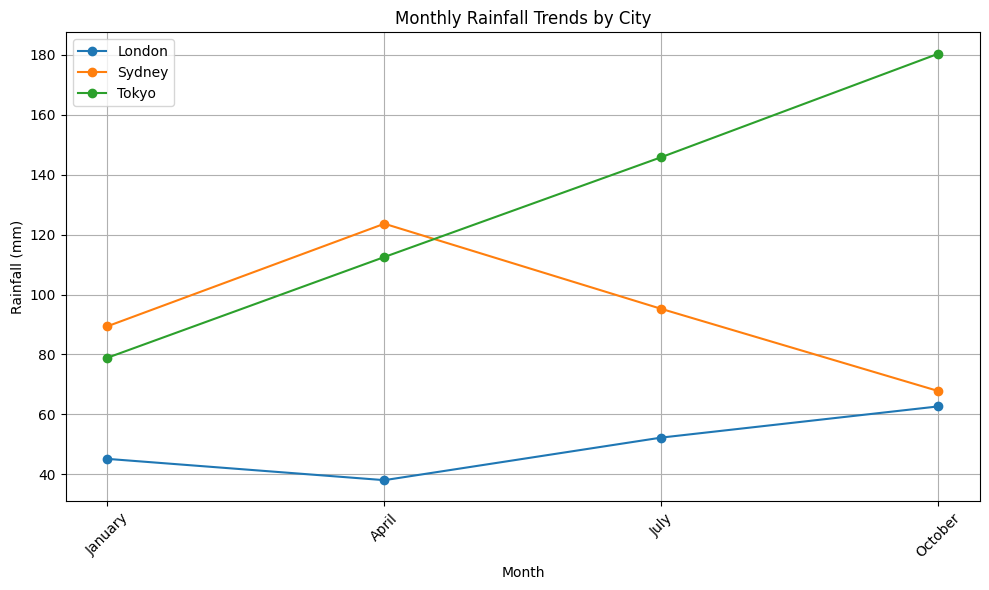

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a Pandas DataFrame with columns 'City', 'Month', and 'Rainfall_mm'
# Sample data: 3 cities, each with 4 months (January, April, July, October) for 12 rows total
data = [
    ['London', 'January', 45.2],
    ['London', 'April', 38.1],
    ['London', 'July', 52.3],
    ['London', 'October', 62.7],
    ['Tokyo', 'January', 78.9],
    ['Tokyo', 'April', 112.5],
    ['Tokyo', 'July', 145.8],
    ['Tokyo', 'October', 180.3],
    ['Sydney', 'January', 89.4],
    ['Sydney', 'April', 123.6],
    ['Sydney', 'July', 95.2],
    ['Sydney', 'October', 67.8]
]

df = pd.DataFrame(data, columns=['City', 'Month', 'Rainfall_mm'])

# Step 2: Use groupby to calculate the total rainfall for each city
totals = df.groupby('City')['Rainfall_mm'].sum()

# Step 3: Sort the results in descending order of rainfall
sorted_totals = totals.sort_values(ascending=False)
print("Total Rainfall by City (Descending Order):")
print(sorted_totals)

# Step 4: Generate a line plot showing monthly rainfall trends for each city
# Pivot the DataFrame for plotting: months as index, cities as columns
df_pivot = df.pivot(index='Month', columns='City', values='Rainfall_mm')

# Define month order for proper sorting on x-axis
month_order = ['January', 'April', 'July', 'October']
df_pivot = df_pivot.reindex(month_order)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

for city in df_pivot.columns:
    ax.plot(df_pivot.index, df_pivot[city], marker='o', label=city)

# Add axis labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall (mm)')
ax.set_title('Monthly Rainfall Trends by City')
ax.legend()
ax.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

## **3D Rubik's Cube Visualization**

In [36]:
# Prompt for 3D Rubik's Cube visualization
prompt = """
Write a Python script that performs the following steps:
1. Uses matplotlib or any suitable Python 3D visualization library to create a 3D Rubik's Cube (3x3).
2. The cube should be represented as smaller colored cubes (each face with standard Rubik's Cube colors: white, yellow, red, orange, blue, green).
3. Display the cube in an interactive 3D plot where the user can rotate the view.
4. Ensure the cube looks like a proper 3x3 Rubik's Cube with distinct faces and colors.
"""

# Let's test it
response = grok_code_fast_1.invoke(prompt)
print(response.content)

```python
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the colors for each face of the Rubik's Cube
face_colors = {
    'front': 'limegreen',   # Green
    'back': 'dodgerblue',   # Blue
    'top': 'white',         # White
    'bottom': 'yellow',     # Yellow
    'left': 'orange',       # Orange
    'right': 'red'          # Red
}

# Create a 3D figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set axis limits for a clear view (the cube spans from -1.5 to 1.5 in all directions)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_axis_off()  # Turn off axis for a cleaner look

# Define the grid of small cube positions (centers at -1, 0, 1)
positions = [-1, 0, 1]

# Plot each small cube's outer faces where they are visible
for ix in positions:
    for iy in positions:
        for iz in positions:
            # Each small cube spans from ix-0.5 to ix+0.5 in x, etc.
            # Define the f

## Testing Generated Code

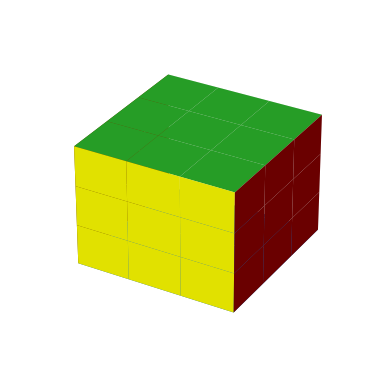

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the colors for each face of the Rubik's Cube
face_colors = {
    'front': 'limegreen',   # Green
    'back': 'dodgerblue',   # Blue
    'top': 'white',         # White
    'bottom': 'yellow',     # Yellow
    'left': 'orange',       # Orange
    'right': 'red'          # Red
}

# Create a 3D figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set axis limits for a clear view (the cube spans from -1.5 to 1.5 in all directions)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_axis_off()  # Turn off axis for a cleaner look

# Define the grid of small cube positions (centers at -1, 0, 1)
positions = [-1, 0, 1]

# Plot each small cube's outer faces where they are visible
for ix in positions:
    for iy in positions:
        for iz in positions:
            # Each small cube spans from ix-0.5 to ix+0.5 in x, etc.
            # Define the faces: only plot if it's on the outer boundary of the big cube

            # Front face (+z direction): plot if iz == 1
            if iz == 1:
                xx, yy = np.meshgrid([ix-0.5, ix+0.5], [iy-0.5, iy+0.5])
                zz = np.full_like(xx, 1.5)  # z = 1.5
                ax.plot_surface(xx, yy, zz, color=face_colors['front'], alpha=1.0)

            # Back face (-z direction): plot if iz == -1
            if iz == -1:
                xx, yy = np.meshgrid([ix-0.5, ix+0.5], [iy-0.5, iy+0.5])
                zz = np.full_like(xx, -1.5)  # z = -1.5
                ax.plot_surface(xx, yy, zz, color=face_colors['back'], alpha=1.0)

            # Top face (+y direction): plot if iy == 1
            if iy == 1:
                xx, zz = np.meshgrid([ix-0.5, ix+0.5], [iz-0.5, iz+0.5])
                yy = np.full_like(xx, 1.5)  # y = 1.5
                ax.plot_surface(xx, yy, zz, color=face_colors['top'], alpha=1.0)

            # Bottom face (-y direction): plot if iy == -1
            if iy == -1:
                xx, zz = np.meshgrid([ix-0.5, ix+0.5], [iz-0.5, iz+0.5])
                yy = np.full_like(xx, -1.5)  # y = -1.5
                ax.plot_surface(xx, yy, zz, color=face_colors['bottom'], alpha=1.0)

            # Left face (-x direction): plot if ix == -1
            if ix == -1:
                yy, zz = np.meshgrid([iy-0.5, iy+0.5], [iz-0.5, iz+0.5])
                xx = np.full_like(yy, -1.5)  # x = -1.5
                ax.plot_surface(xx, yy, zz, color=face_colors['left'], alpha=1.0)

            # Right face (+x direction): plot if ix == 1
            if ix == 1:
                yy, zz = np.meshgrid([iy-0.5, iy+0.5], [iz-0.5, iz+0.5])
                xx = np.full_like(yy, 1.5)  # x = 1.5
                ax.plot_surface(xx, yy, zz, color=face_colors['right'], alpha=1.0)

# Display the plot (interactive rotation is enabled by default in matplotlib's 3D plots)
plt.show()